# Module 2 Code

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 2.1

In [2]:
complex_data = np.load("../data/Module2/kspace.npy") # load data

In [3]:
coil_dim = complex_data.shape[0] # the coil dimension is the first array dimension
print(complex_data.shape)
print(coil_dim)

(6, 280, 280)
6


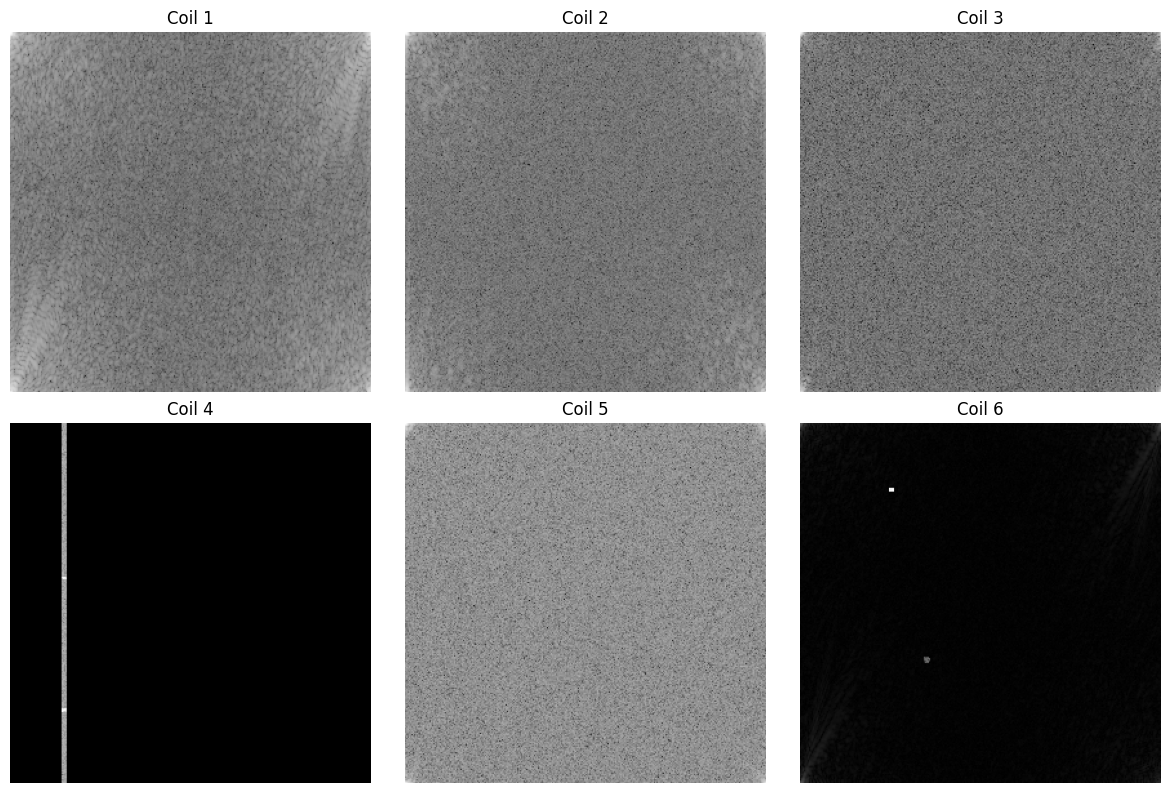

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat): # going through each coil
    ax.imshow(np.log1p(np.abs(complex_data[i])), cmap='gray')  # Taking magnitude for visualization and plotting it
    ax.set_title(f"Coil {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()


In [5]:
transposed = np.fft.ifft2(complex_data) # transpose the complex data into image space

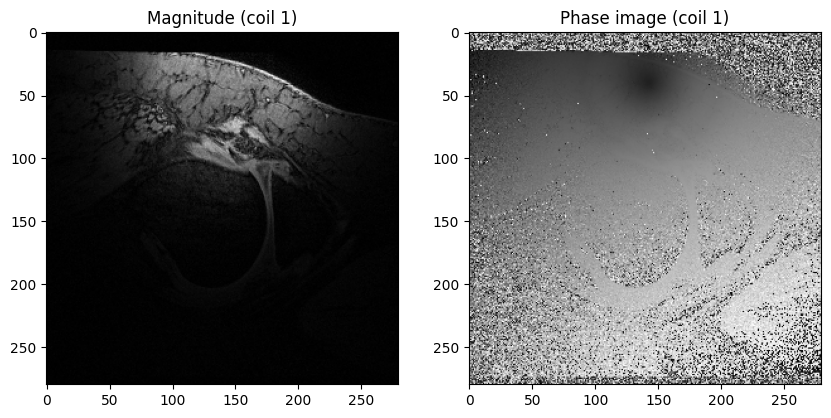

In [6]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(np.abs(transposed[0]), cmap='gray') # first coil magnitude 
plt.title('Magnitude (coil 1)')

plt.subplot(122)
plt.imshow(np.angle(transposed[0]), cmap='gray') # first coil phase 
plt.title('Phase image (coil 1)')

plt.show()

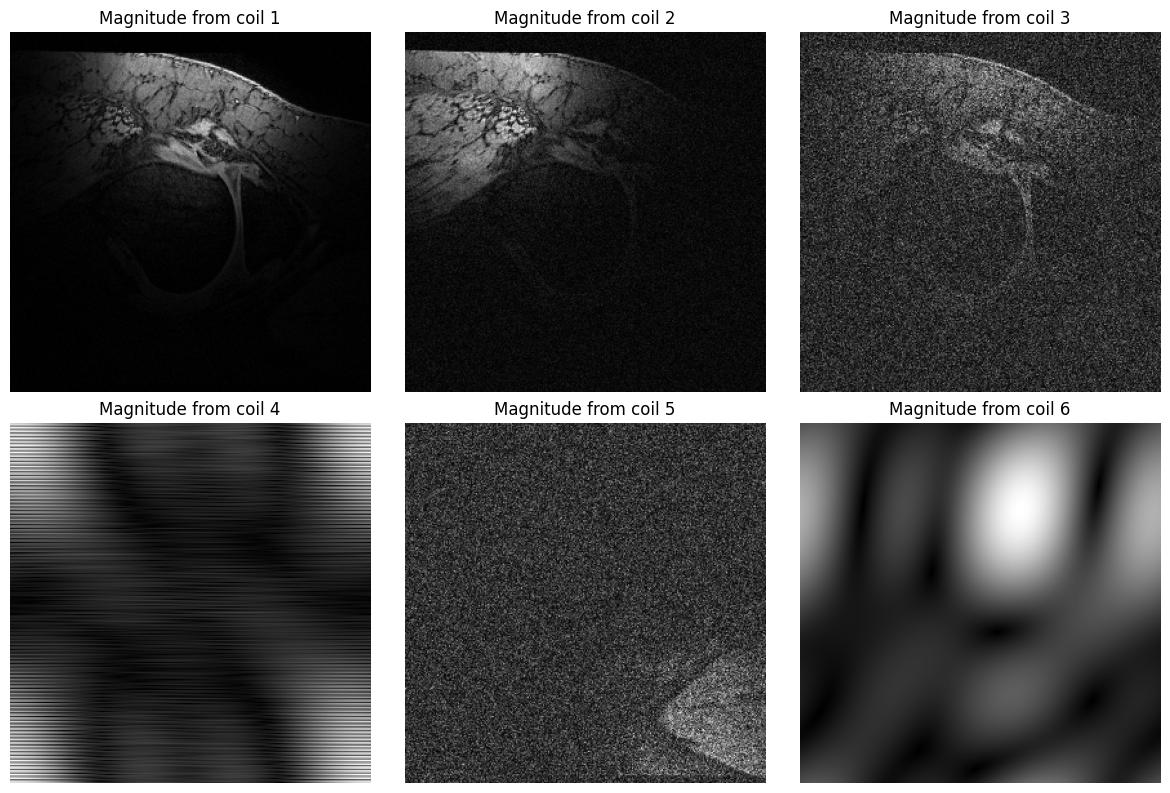

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    ax.imshow(np.abs(transposed[i]), cmap='gray') # For each coil, take the magnitude for visualization
    ax.set_title(f"Magnitude from coil {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

In [8]:
combined_image_sq = np.zeros(transposed[0].shape) # initialise the combined image

for i in range(6):

    combined_image_sq = combined_image_sq + np.abs(transposed[i])**2 # square each image and add it as a cumulative sum across all coils
    
combined_image = np.sqrt(combined_image_sq) # square root the final result to obtain the final image

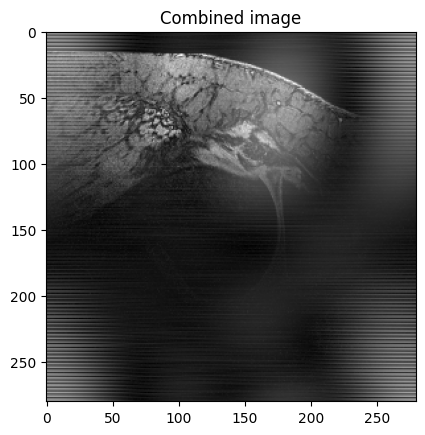

In [9]:
plt.imshow(combined_image, cmap='gray')
plt.title("Combined image")
plt.show()

Coils 4 and 6 look erroneous, so let's get an image where these coils are not taken into account and compare with above

In [10]:
better_combined_image_sq = np.zeros(transposed[0].shape) # initialise the combined image

for i in range(6):
    if i!=3 and i!=5: # skip the 'broken' coils
        better_combined_image_sq = better_combined_image_sq + np.abs(transposed[i])**2 # square each image and add it as a cumulative sum across all coils

better_combined_image = np.sqrt(better_combined_image_sq) # square root the final result to obtain the final image

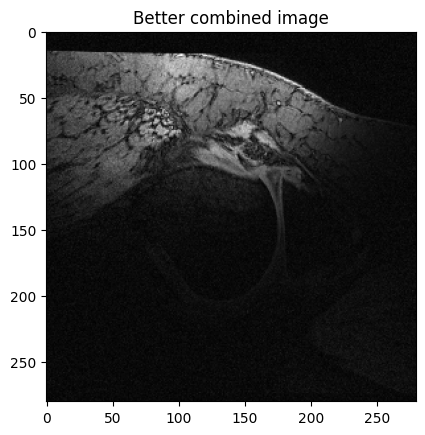

In [11]:
plt.imshow(better_combined_image, cmap='gray')
plt.title("Better combined image")
plt.show()

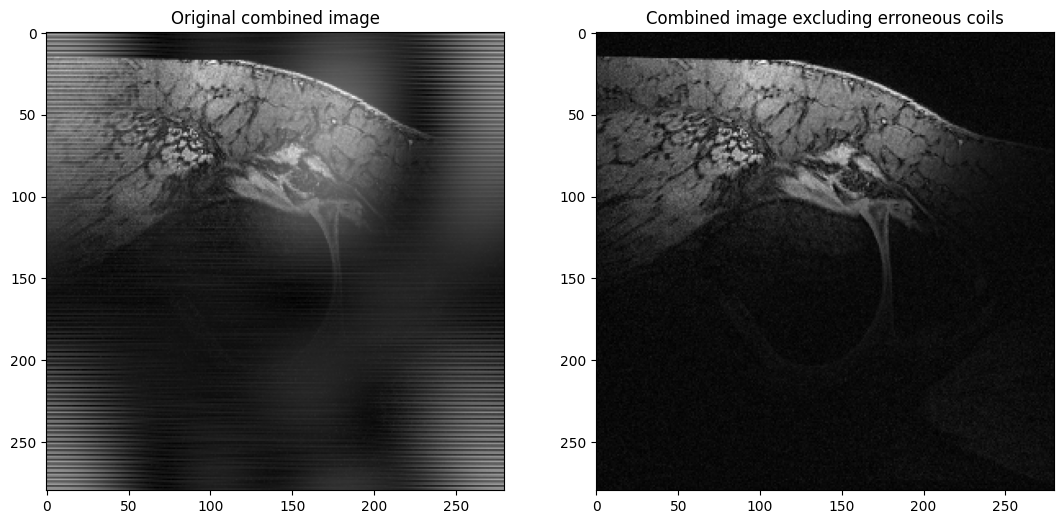

In [12]:
# Display
plt.figure(figsize=(13,10))
plt.subplot(121)
plt.imshow(combined_image, cmap="gray") 
plt.title("Original combined image")

plt.subplot(122)
plt.imshow(better_combined_image, cmap="gray")
plt.title("Combined image excluding erroneous coils")
plt.show()


Excluding the seemingly erroneous coils gives a nicer image, there are no horizontal stripes and 'patchy' areas in the new combined image

### Exercise 2.2

Use the gaussian filter, bilateral, and wavelet methods to denoise the image

In [13]:
from scipy.ndimage import gaussian_filter
from skimage.restoration import denoise_wavelet, denoise_bilateral

Apply gaussian filter denoising method to all coils and show the result

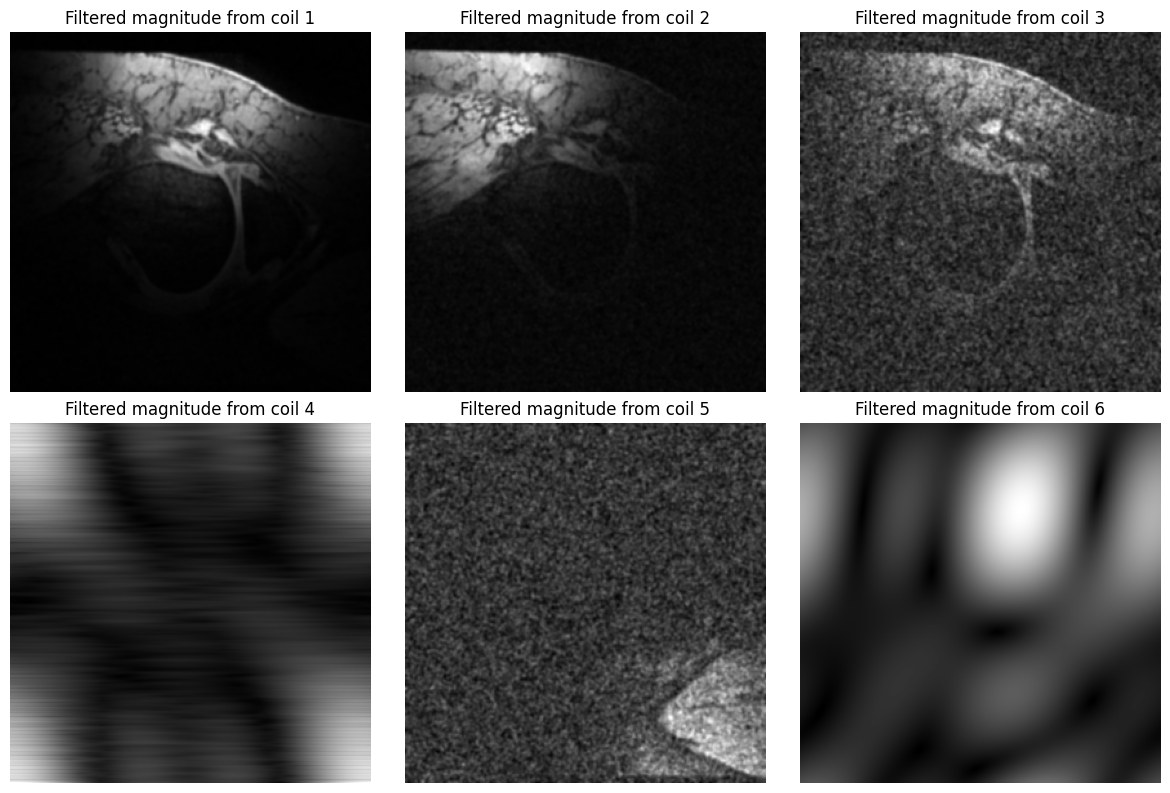

In [14]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    
    filtered_mag = gaussian_filter(np.abs(transposed[i]), sigma=1) # using an arbitary sigma
    ax.imshow(filtered_mag, cmap='gray') 
    ax.set_title(f"Filtered magnitude from coil {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

Apply bilateral denoising method to all coils and show the result

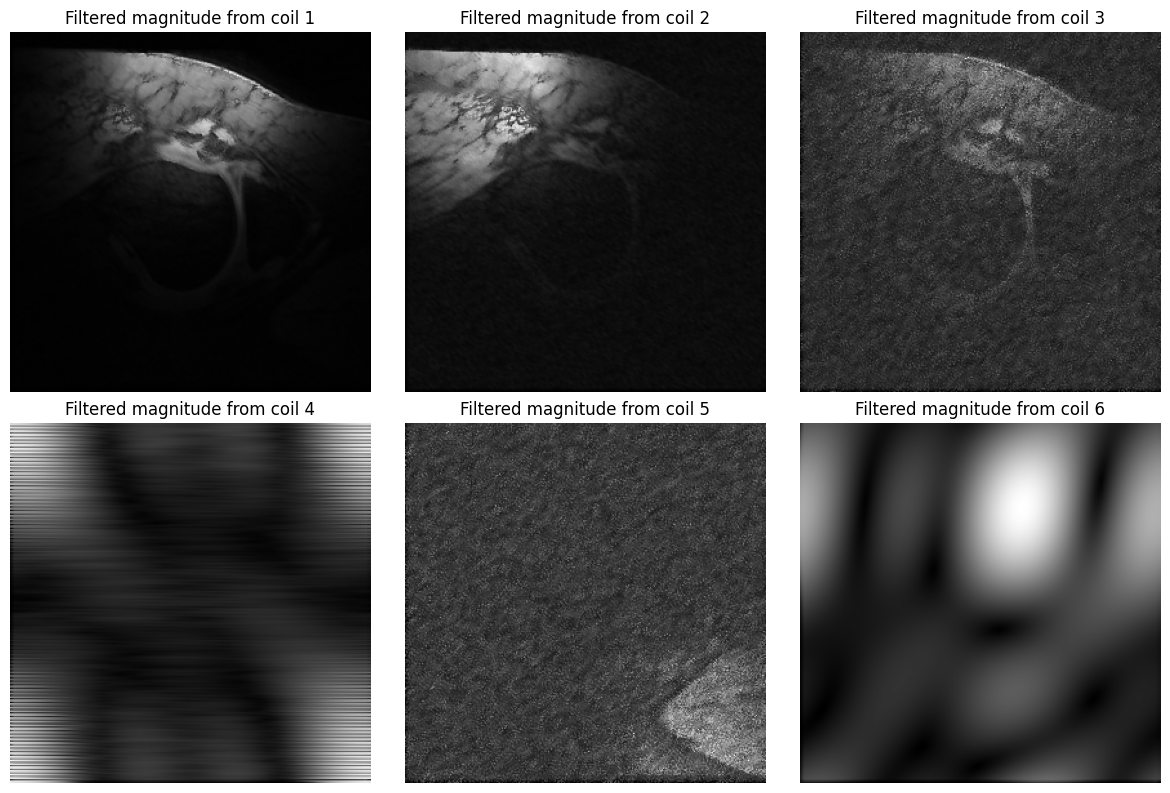

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    
    filtered_mag = denoise_bilateral(np.abs(transposed[i]))
    ax.imshow(filtered_mag, cmap='gray')  
    ax.set_title(f"Filtered magnitude from coil {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

Apply wavelet denoising method to all coils and show the result

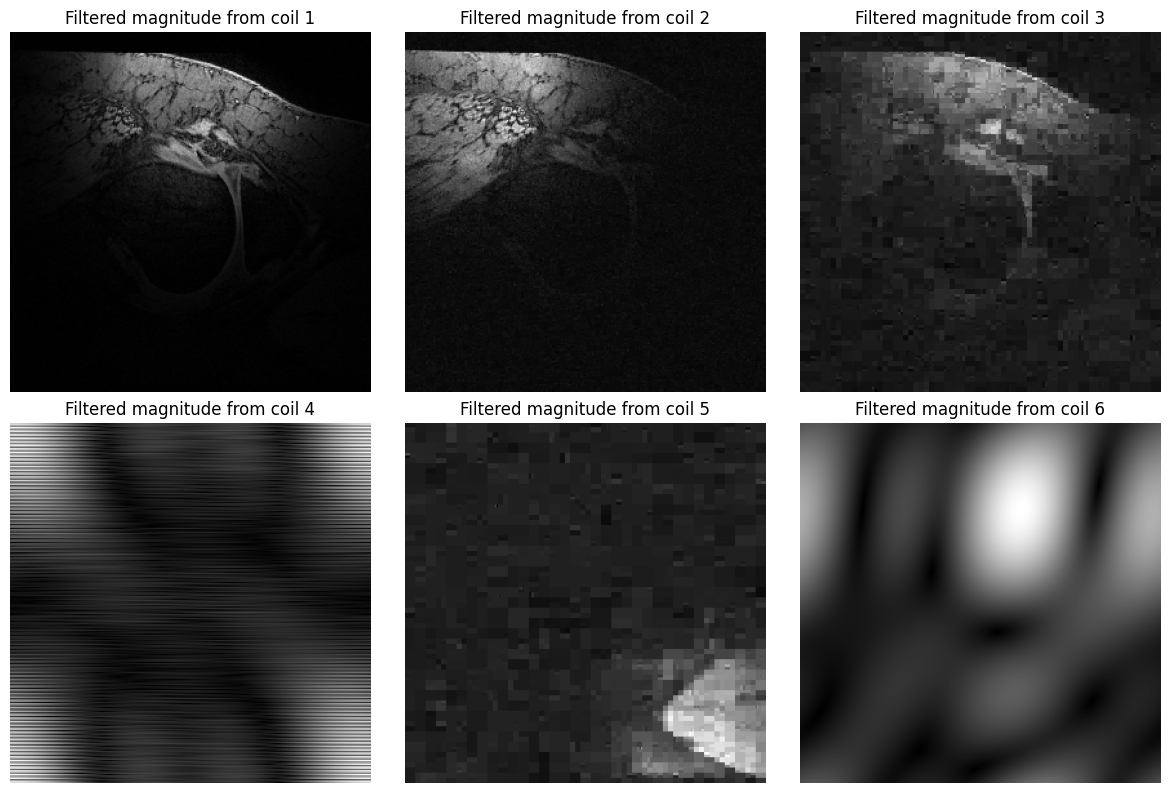

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, ax in enumerate(axes.flat):
    
    filtered_mag = denoise_wavelet(np.abs(transposed[i]))
    ax.imshow(filtered_mag, cmap='gray')  # Taking magnitude for visualization
    ax.set_title(f"Filtered magnitude from coil {i+1}")
    ax.axis("off")

plt.tight_layout()
plt.show()

Now use butterworth lowpass filter to denoise the first coil and show the resulting magnitude and phase images

In [17]:
def butterworth_lowpass_filter(shape, D0=30, n=2):
    """
    Construct butterworth lowpass filter

    Parameters
    - shape (tuple): shape of the filter
    - D0 (float): cutoff frequency
    - n (int): butterworth filter order

    Returns
    - H (array): butterworth lowpass filter
    """

    P, Q = shape[0], shape[1]
    u = np.arange(P) - P // 2
    v = np.arange(Q) - Q // 2
    U, V = np.meshgrid(u, v, indexing='ij')
    D = np.sqrt(U**2 + V**2)
    H = 1 / (1 + (D / D0) ** (2 * n))

    return H

In [18]:
butter_filter = butterworth_lowpass_filter(complex_data[0, :, :].shape) # get the butterworth lowpass filter

filtered_k = np.fft.fftshift(complex_data[0, :, :]) * butter_filter # shift the image to be zero centered

filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_k)) # ifftshift it so it is in the same format as expected by ifft2

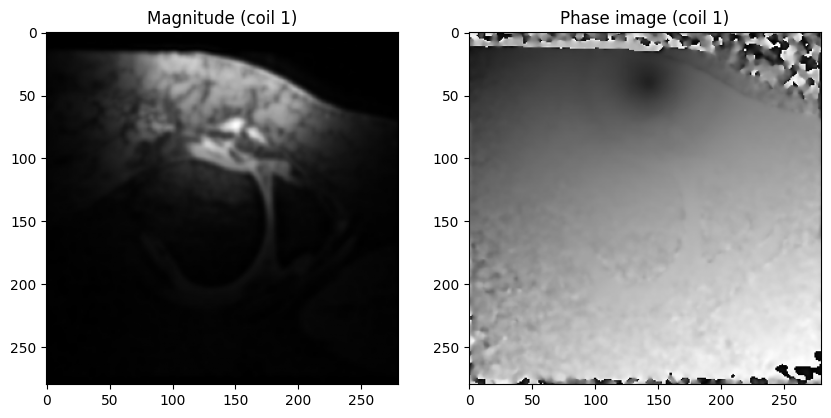

In [19]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(np.abs(filtered_image), cmap='gray') 
plt.title('Magnitude (coil 1)')

plt.subplot(122)
plt.imshow(np.angle(filtered_image), cmap='gray')
plt.title('Phase image (coil 1)')

plt.show()

Use the Butterworth filter to create a new combined image using the same method and then show the result

In [20]:
butter_combined_image_sq = np.zeros(transposed[0].shape)

for i in range(6):

    butter_filter = butterworth_lowpass_filter(complex_data[i, :, :].shape) # get the butterworth lowpass filter

    filtered_k = np.fft.fftshift(complex_data[i, :, :]) * butter_filter # shift the image to be zero centered

    filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_k)) # ifftshift it so it is in the same format as expected by ifft2

    butter_combined_image_sq = butter_combined_image_sq + np.abs(filtered_image)**2 

butter_combined_image = np.sqrt(butter_combined_image_sq)

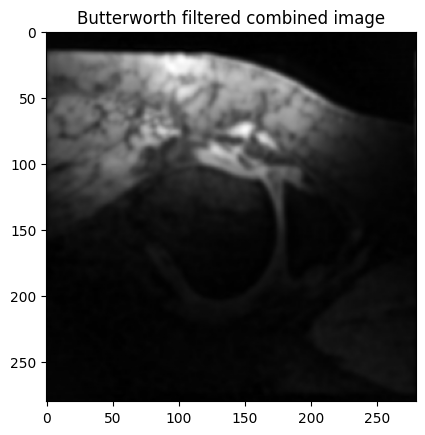

In [21]:
plt.imshow(butter_combined_image, cmap='gray')
plt.title("Butterworth filtered combined image")
plt.show()